# Методы многомерной оптимизации
## Метод градиентного спуска


**Задача 1**


![условие задачи](task4.png)

**Вариант 3**

![вариант 3](var3.png)

## Решение

**1. Инициализация**

In [1]:
from math import fabs

Объявляю функцию со своими коэффициентами и частные производные первого порядка 

In [2]:
def f(_x1, _x2): 
    return 32*( (_x2+14-_x1**2)**2 ) + ( (110-_x1)**2 ) + _x1**2

In [3]:
def dfdx1(_x1, _x2): 
    return 4 * (-55 + 32*pow(_x1, 3) - _x1*(447 + 32*_x2))

In [4]:
def dfdx2(_x1, _x2):
    return -64 * (-14 + _x1**2 - _x2)

**2. Графики для понимания**

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

График самой функции

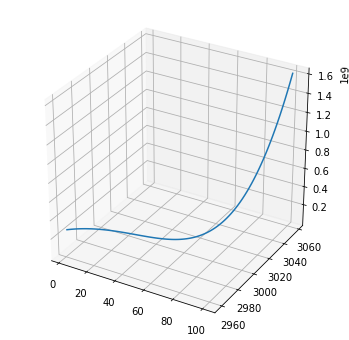

In [6]:
X1 = [x for x in range(2, 102, 1)]
X2 = [x for x in range(2959, 3059, 1)]
Z  = [f(X1[i], X2[i]) for i in range(100)]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X1, X2, Z)

Производная по Х1

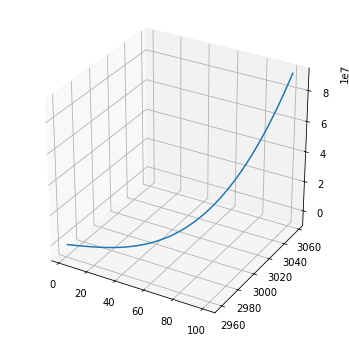

In [7]:
X1 = [x for x in range(2, 102, 1)]
X2 = [x for x in range(2959, 3059, 1)]
Z  = [dfdx1(X1[i], X2[i]) for i in range(100)]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X1, X2, Z)

Производная по Х2

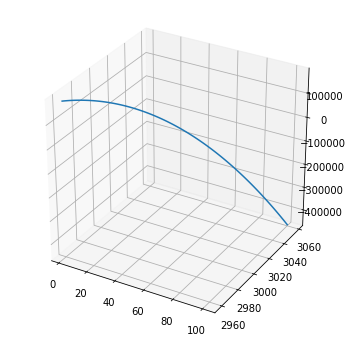

In [8]:
X1 = [x for x in range(2, 102, 1)]
X2 = [x for x in range(2959, 3059, 1)]
Z  = [dfdx2(X1[i], X2[i]) for i in range(100)]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X1, X2, Z)

**3. Условие остановки**

`модуль производной f по х1 на шаге k <= 0.05` ИЛИ `модуль производной f по х2 на шаге k <= 0.05`



In [9]:
THR = 0.05

In [10]:
def stop_condition(x1, x2):
    derivative1 = dfdx1(x1, x2)
    derivative2 = dfdx2(x1, x2)
    
    if fabs(derivative1) <= THR or fabs(derivative2) <= THR:
        return True
    else:
        return False

**4. Спуск**

В цикле уменьшаем значени x1 и x2 в соответсвии с методом ГС, до тех пор пока не выполнится условие остановки

Печать значений текущего шага

In [25]:
def printstep(_k, _x1, _x2, _der1, _der2):
    print(f"Шаг {_k :>3}. x1={_x1 :.2f} x2={_x2 :.2f} dfdx1={_der1 :.2f} dfdx2={_der2 :.2f}")
    print('-'*80)

Скорость спуска и значения на нулевом шаге

In [28]:
a =100

x1 = 52.0
x2 = 3009.0
k =  0

In [29]:
# печатаю все значения до начала спуска (на нулевом шаге)
printstep(0, x1, x2, dfdx1(x1, x2), dfdx2(x1, x2))

while True:
    k += 1
    
    # значения производных от аргументов на k - 1 шаге  
    der1 = dfdx1(x1, x2)
    der2 = dfdx2(x1, x2)
    
    # обновляю на текущем шаге 
    x1 = x1 - a * dfdx1(x1, x2)
    x2 = x2 - a * dfdx2(x1, x2)
    
    # вывожу текущие значения актуальные для этого шага 
    printstep(k, x1, x2, dfdx1(x1, x2), dfdx2(x1, x2))
    
    if stop_condition(x1, x2):
        break

Шаг   0. x1=52.00 x2=3009.00 dfdx1=-2123276.00 dfdx2=20416.00
--------------------------------------------------------------------------------
Шаг   1. x1=212327652.00 x2=288531403544512495616.00 dfdx1=-7840463752778606404577718697984.00 dfdx2=18463124512813355106304.00
--------------------------------------------------------------------------------
Шаг   2. x1=784046375277860604428974850834432.00 x2=3934263798952651400043454870972692411085506115944594821235446221111296.00 dfdx1=-394772901776914617615320441519297388730125019825025812736114816965165792473184113307560974043593366831104.00 dfdx2=251753540494980148660335159941198985941524275739133658840427368330297344.00
--------------------------------------------------------------------------------


OverflowError: (34, 'Result too large')